# Swan Consulting

## Import Librairies and Data

In [150]:
# Data
import pandas as pd
import numpy as np

# Visualise
import matplotlib.pyplot as plt
import seaborn as sns

# Regex
import re

# For measuring our models performance
from sklearn import metrics
from time import time

# Import various model stuff
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier

In [206]:
# Read in data
df = pd.read_csv('Swan_Project_Data.csv')

In [4]:
# Set option to display all columns
pd.set_option('display.max_columns', None)


In [54]:
# Look at first few rows of data
df.head(2)

,CustomerID,Count,Country,State,City,Zip Code,Lat Long,Latitude,Longitude,Gender,Senior Citizen,Partner,Dependents,Tenure Months,Phone Service,Multiple Lines,Internet Service,Online Security,Online Backup,Device Protection,Tech Support,Streaming TV,Streaming Movies,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Label,Churn Value,Churn Reason
0,3668-QPYBK,1,United States,California,Los Angeles,90003,"33.964131, -118.272783",33.964131,-118.272783,Male,No,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1,Competitor made better offer
1,9237-HQITU,1,United States,California,Los Angeles,90005,"34.059281, -118.30742",34.059281,-118.307420,Female,No,No,Yes,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1,Moved


### Some Basic Checks

In [10]:
# Datatypes of object
df.dtypes

CustomerID            object
Count                  int64
Country               object
State                 object
City                  object
Zip Code               int64
Lat Long              object
Latitude             float64
Longitude            float64
Gender                object
Senior Citizen        object
Partner               object
Dependents            object
Tenure Months          int64
Phone Service         object
Multiple Lines        object
Internet Service      object
Online Security       object
Online Backup         object
Device Protection     object
Tech Support          object
Streaming TV          object
Streaming Movies      object
Contract              object
Paperless Billing     object
Payment Method        object
Monthly Charges      float64
Total Charges         object
Churn Label           object
Churn Value            int64
Churn Reason          object
dtype: object

In [12]:
# How many rows and columns we have
df.shape

(7043, 31)

In [14]:
# Nulls and Datatypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 31 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CustomerID         7043 non-null   object 
 1   Count              7043 non-null   int64  
 2   Country            7043 non-null   object 
 3   State              7043 non-null   object 
 4   City               7043 non-null   object 
 5   Zip Code           7043 non-null   int64  
 6   Lat Long           7043 non-null   object 
 7   Latitude           7043 non-null   float64
 8   Longitude          7043 non-null   float64
 9   Gender             7043 non-null   object 
 10  Senior Citizen     7043 non-null   object 
 11  Partner            7043 non-null   object 
 12  Dependents         7043 non-null   object 
 13  Tenure Months      7043 non-null   int64  
 14  Phone Service      7043 non-null   object 
 15  Multiple Lines     7043 non-null   object 
 16  Internet Service   7043 

In [16]:
# Summary Statistics
df.describe()

,Count,Zip Code,Latitude,Longitude,Tenure Months,Monthly Charges,Churn Value
count,7043.0,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,1.0,93521.964646,36.282441,-119.798880,32.371149,64.761692,0.265370
std,0.0,1865.794555,2.455723,2.157889,24.559481,30.090047,0.441561
min,1.0,90001.000000,32.555828,-124.301372,0.000000,18.250000,0.000000
25%,1.0,92102.000000,34.030915,-121.815412,9.000000,35.500000,0.000000
50%,1.0,93552.000000,36.391777,-119.730885,29.000000,70.350000,0.000000
75%,1.0,95351.000000,38.224869,-118.043237,55.000000,89.850000,1.000000
max,1.0,96161.000000,41.962127,-114.192901,72.000000,118.750000,1.000000


#### Notes
* Multiple object columns
* Drop Columns --> Count (all just 1's) ; Country (United States) ; State (California) ; Churn Label (have Churn Value)
* Sanity Checks --> Lat Long is combination of the Latitude and Longitude columns ; How is Total Charges Calculated? 
* Nulls ---> Churn Reason (5174 - All the customers that haven't left yet) ; Spaces in Total charges (difficulty in converting to float)

### Feature Engineering

#### Basic Ones
* Mappinng Yes and No's to 1's and 0's
* Fixing Total Charges

In [58]:
# yn_cols = [col for col in df.columns if ('Yes' and 'No') in list(df[f'{col}'].unique()) ]

In [84]:
# # list of columns with yes's and no's
# yn_cols = ['Senior Citizen','Partner','Dependents','Phone Service','Multiple Lines','Online Security',
#              'Online Backup','Device Protection','Tech Support','Streaming TV','Streaming Movies',
#              'Paperless Billing']
# # mapping
# for col in yn_cols:
#     df[f'{col}'] = df[f'{col}'].map({'No':0, 'Yes':1, 'No phone service':0, 'No internet service':0})
#     df[f'{col}'].astype(int)
    


In [86]:
# # check thats all they have
# for col in yn_cols:
#     print(f'The column {col} contains these values {df[col].unique()}')

The column Senior Citizen contains these values [0 1]
The column Partner contains these values [0 1]
The column Dependents contains these values [0 1]
The column Phone Service contains these values [1 0]
The column Multiple Lines contains these values [0 1]
The column Online Security contains these values [1 0]
The column Online Backup contains these values [1 0]
The column Device Protection contains these values [0 1]
The column Tech Support contains these values [0 1]
The column Streaming TV contains these values [0 1]
The column Streaming Movies contains these values [0 1]
The column Paperless Billing contains these values [1 0]


In [88]:
df.head()

,CustomerID,Count,Country,State,City,Zip Code,Lat Long,Latitude,Longitude,Gender,Senior Citizen,Partner,Dependents,Tenure Months,Phone Service,Multiple Lines,Internet Service,Online Security,Online Backup,Device Protection,Tech Support,Streaming TV,Streaming Movies,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Label,Churn Value,Churn Reason
0,3668-QPYBK,1,United States,California,Los Angeles,90003,"33.964131, -118.272783",33.964131,-118.272783,Male,0,0,0,2,1,0,DSL,1,1,0,0,0,0,Month-to-month,1,Mailed check,53.85,108.15,Yes,1,Competitor made better offer
1,9237-HQITU,1,United States,California,Los Angeles,90005,"34.059281, -118.30742",34.059281,-118.307420,Female,0,0,1,2,1,0,Fiber optic,0,0,0,0,0,0,Month-to-month,1,Electronic check,70.70,151.65,Yes,1,Moved
2,9305-CDSKC,1,United States,California,Los Angeles,90006,"34.048013, -118.293953",34.048013,-118.293953,Female,0,0,1,8,1,1,Fiber optic,0,0,1,0,1,1,Month-to-month,1,Electronic check,99.65,820.5,Yes,1,Moved
3,7892-POOKP,1,United States,California,Los Angeles,90010,"34.062125, -118.315709",34.062125,-118.315709,Female,0,1,1,28,1,1,Fiber optic,0,0,1,1,1,1,Month-to-month,1,Electronic check,104.80,3046.05,Yes,1,Moved
4,0280-XJGEX,1,United States,California,Los Angeles,90015,"34.039224, -118.266293",34.039224,-118.266293,Male,0,0,1,49,1,1,Fiber optic,0,1,1,0,1,1,Month-to-month,1,Bank transfer (automatic),103.70,5036.3,Yes,1,Competitor had better devices


* So can map **['Senior Citizen','Partner','Dependents','Phone Service', 'Paperless Billing']**
* The others **['Multiple Lines','Online Security','Online Backup','Device Protection','Tech Support','Streaming TV','Streaming Movies',]** contain an extra _'No phone sevice'_ for **'Multiple Lines'** Column and _'No internet service'_ for the rest ---> carry out sanity checks /// also OHE or just map to 0?

In [28]:
# list(df['Phone Service'].unique())

['Yes', 'No']

In [65]:
# # Shows that Total Charges has nulls in the form of an empty string
# (df['Total Charges'] == ' ').any()

True

In [67]:
# # Gives the indexes for where this happens
# df[df['Total Charges'] == ' '].index # happens when tenure month = 0

Index([2234, 2438, 2568, 2667, 2856, 4331, 4687, 5104, 5719, 6772, 6840], dtype='int64')

In [69]:
# # Converts the column to float type with the empty string as nulls
# df['Total Charges'] = pd.to_numeric(df['Total Charges'], errors='coerce')

# # Fills nulls with zeros 
# df['Total Charges'] = df['Total Charges'].fillna(value = 0)

In [71]:
# df.head()

,CustomerID,Count,Country,State,City,Zip Code,Lat Long,Latitude,Longitude,Gender,Senior Citizen,Partner,Dependents,Tenure Months,Phone Service,Multiple Lines,Internet Service,Online Security,Online Backup,Device Protection,Tech Support,Streaming TV,Streaming Movies,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Label,Churn Value,Churn Reason
0,3668-QPYBK,1,United States,California,Los Angeles,90003,"33.964131, -118.272783",33.964131,-118.272783,Male,No,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1,Competitor made better offer
1,9237-HQITU,1,United States,California,Los Angeles,90005,"34.059281, -118.30742",34.059281,-118.307420,Female,No,No,Yes,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1,Moved
2,9305-CDSKC,1,United States,California,Los Angeles,90006,"34.048013, -118.293953",34.048013,-118.293953,Female,No,No,Yes,8,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.50,Yes,1,Moved
3,7892-POOKP,1,United States,California,Los Angeles,90010,"34.062125, -118.315709",34.062125,-118.315709,Female,No,Yes,Yes,28,Yes,Yes,Fiber optic,No,No,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes,1,Moved
4,0280-XJGEX,1,United States,California,Los Angeles,90015,"34.039224, -118.266293",34.039224,-118.266293,Male,No,No,Yes,49,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.30,Yes,1,Competitor had better devices


## EDA

In [ ]:
# for my_column in df.columns:
#     plt.figure(figsize=(8, 5))
#     sns.scatterplot(y=my_column, 
#                   x="City",
#                   hue="Churn Value", 
#                   data=df)
    
#     plt.title(f'Corrleation of {my_column} against City')
#     plt.xlabel(my_column)
#     plt.ylabel('City')
#     plt.xticks(rotation = 45,
#               horizontalalignment = 'right')
#     plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
#     #plt.grid()  # adds grid --> looks messy for the first graph
#     plt.show()

In [797]:
df[df['Churn Value'] == 1].sample()

,CustomerID,Count,Country,State,City,Zip Code,Lat Long,Latitude,Longitude,Gender,Senior Citizen,Partner,Dependents,Tenure Months,Phone Service,Multiple Lines,Internet Service,Online Security,Online Backup,Device Protection,Tech Support,Streaming TV,Streaming Movies,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Label,Churn Value,Churn Reason
936,6210-KBBPI,1,United States,California,West Covina,91790,"34.066964, -117.937007",34.066964,-117.937007,Male,Yes,No,No,9,Yes,Yes,Fiber optic,No,Yes,No,No,Yes,Yes,Month-to-month,Yes,Credit card (automatic),99.45,919.4,Yes,1,Competitor had better devices


In [113]:
df.head()

,Gender,Senior Citizen,Partner,Dependents,Tenure Months,Phone Service,Multiple Lines,Internet Service,Online Security,Online Backup,Device Protection,Tech Support,Streaming TV,Streaming Movies,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Value,Churn Reason
0,Male,0,0,0,2,1,0,DSL,1,1,0,0,0,0,Month-to-month,1,Mailed check,53.85,108.15,1,Competitor made better offer
1,Female,0,0,1,2,1,0,Fiber optic,0,0,0,0,0,0,Month-to-month,1,Electronic check,70.70,151.65,1,Moved
2,Female,0,0,1,8,1,1,Fiber optic,0,0,1,0,1,1,Month-to-month,1,Electronic check,99.65,820.5,1,Moved
3,Female,0,1,1,28,1,1,Fiber optic,0,0,1,1,1,1,Month-to-month,1,Electronic check,104.80,3046.05,1,Moved
4,Male,0,0,1,49,1,1,Fiber optic,0,1,1,0,1,1,Month-to-month,1,Bank transfer (automatic),103.70,5036.3,1,Competitor had better devices


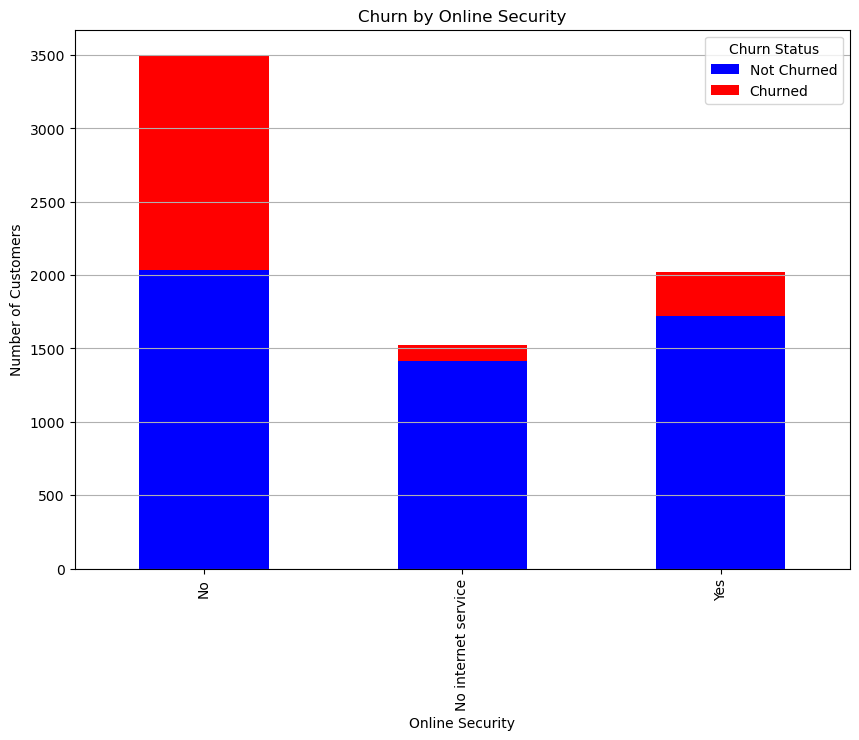

In [832]:
churn_counts = df.groupby(['Online Security', 'Churn Value']).size().unstack(fill_value=0)

# Plotting
churn_counts.plot(kind='bar', 
                  stacked=True,  
                  #color=['blue', 'red'],
                  figsize=(10, 7))

plt.title('Churn by Online Security')
plt.xlabel('Online Security')
plt.ylabel('Number of Customers')
plt.legend(['Not Churned', 'Churned'], title='Churn Status')
plt.grid(axis = 'y')
plt.show()

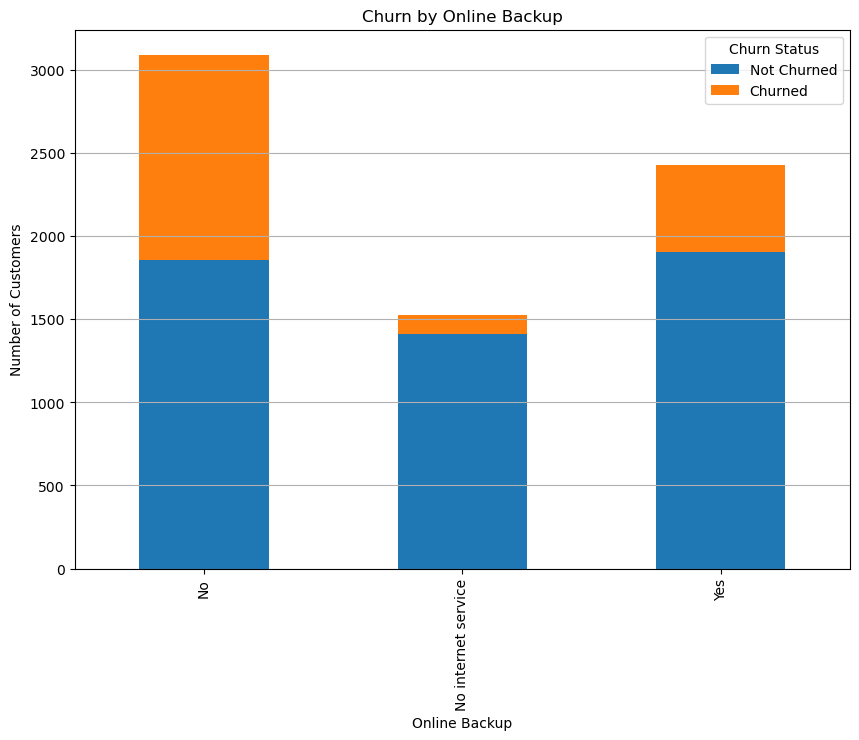

In [834]:
churn_counts = df.groupby(['Online Backup', 'Churn Value']).size().unstack(fill_value=0)

# Plotting
churn_counts.plot(kind='bar', 
                  stacked=True,  
                  #color=['blue', 'red'],
                  figsize=(10, 7))

plt.title('Churn by Online Backup')
plt.xlabel('Online Backup')
plt.ylabel('Number of Customers')
plt.legend(['Not Churned', 'Churned'], title='Churn Status')
plt.grid(axis = 'y')
plt.show()

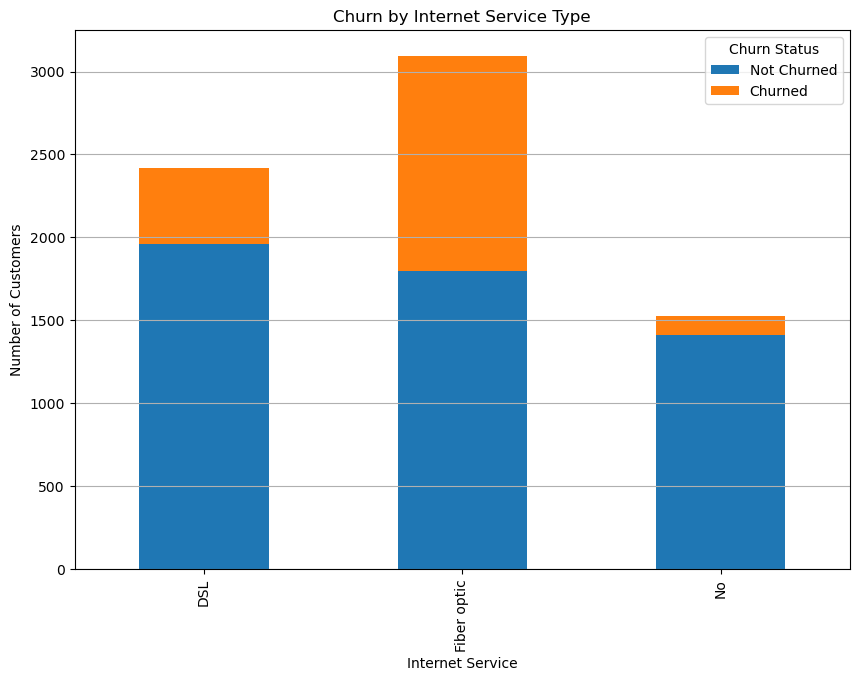

In [830]:
churn_counts = df.groupby(['Internet Service', 'Churn Value']).size().unstack(fill_value=0)

# Plotting
churn_counts.plot(kind='bar', 
                  stacked=True,  
                  #color=['blue', 'red'],
                  figsize=(10, 7))

plt.title('Churn by Internet Service Type')
plt.xlabel('Internet Service')
plt.ylabel('Number of Customers')
plt.legend(['Not Churned', 'Churned'], title='Churn Status')
plt.grid(axis = 'y')
plt.show()

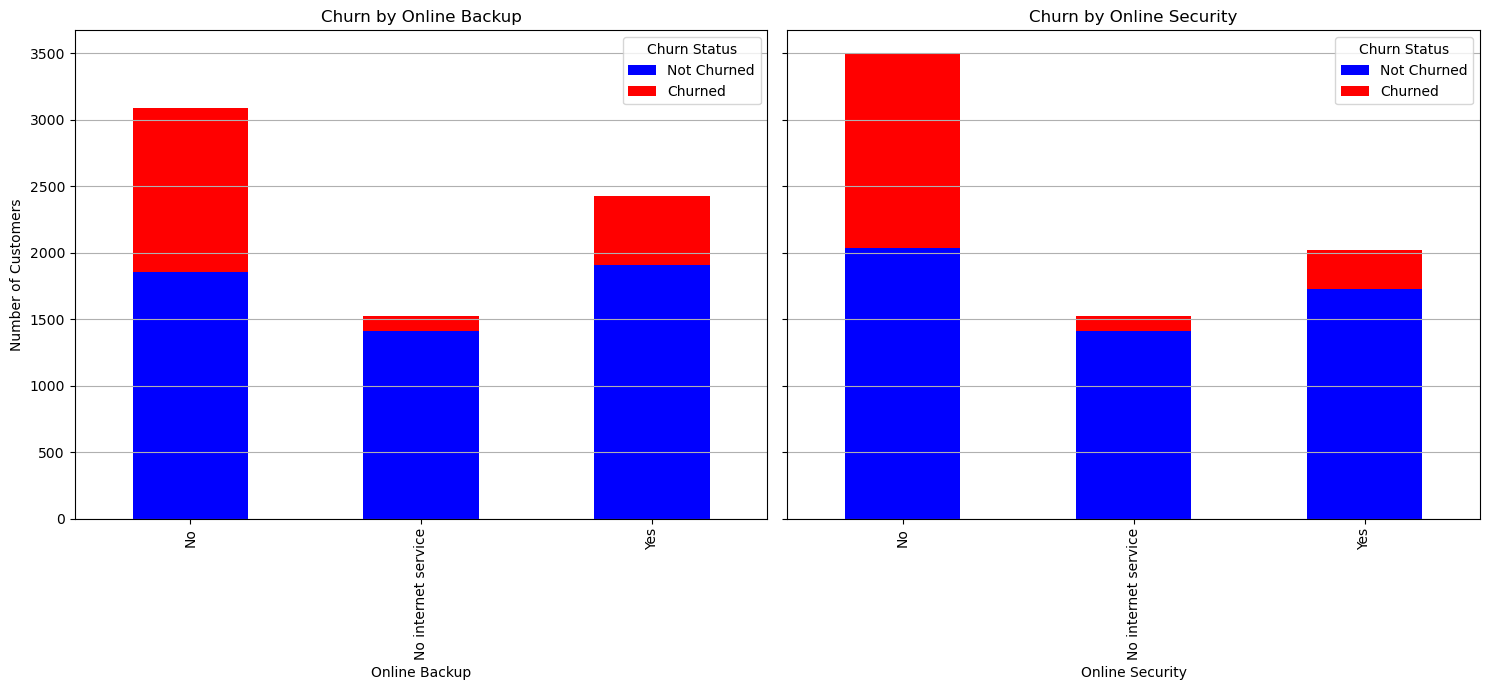

In [844]:
# Count churn and not churn for each backup type
churn_counts_backup = df.groupby(['Online Backup', 'Churn Value']).size().unstack(fill_value=0)

# Count churn and not churn for each Security type
churn_counts_security = df.groupby(['Online Security', 'Churn Value']).size().unstack(fill_value=0)

# Plotting
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 7), sharey=True)

# Plot for backup Service
churn_counts_backup.plot(kind='bar', stacked=True, color=['blue', 'red'], ax=axes[0])
axes[0].set_title('Churn by Online Backup')
axes[0].set_xlabel('Online Backup')
axes[0].set_ylabel('Number of Customers')
axes[0].legend(['Not Churned', 'Churned'], title='Churn Status')
axes[0].grid(axis='y')

# Plot for Online Security
churn_counts_security.plot(kind='bar', stacked=True, color=['blue', 'red'], ax=axes[1])
axes[1].set_title('Churn by Online Security')
axes[1].set_xlabel('Online Security')
axes[1].legend(['Not Churned', 'Churned'], title='Churn Status')
axes[1].grid(axis='y')

plt.tight_layout()
plt.show()


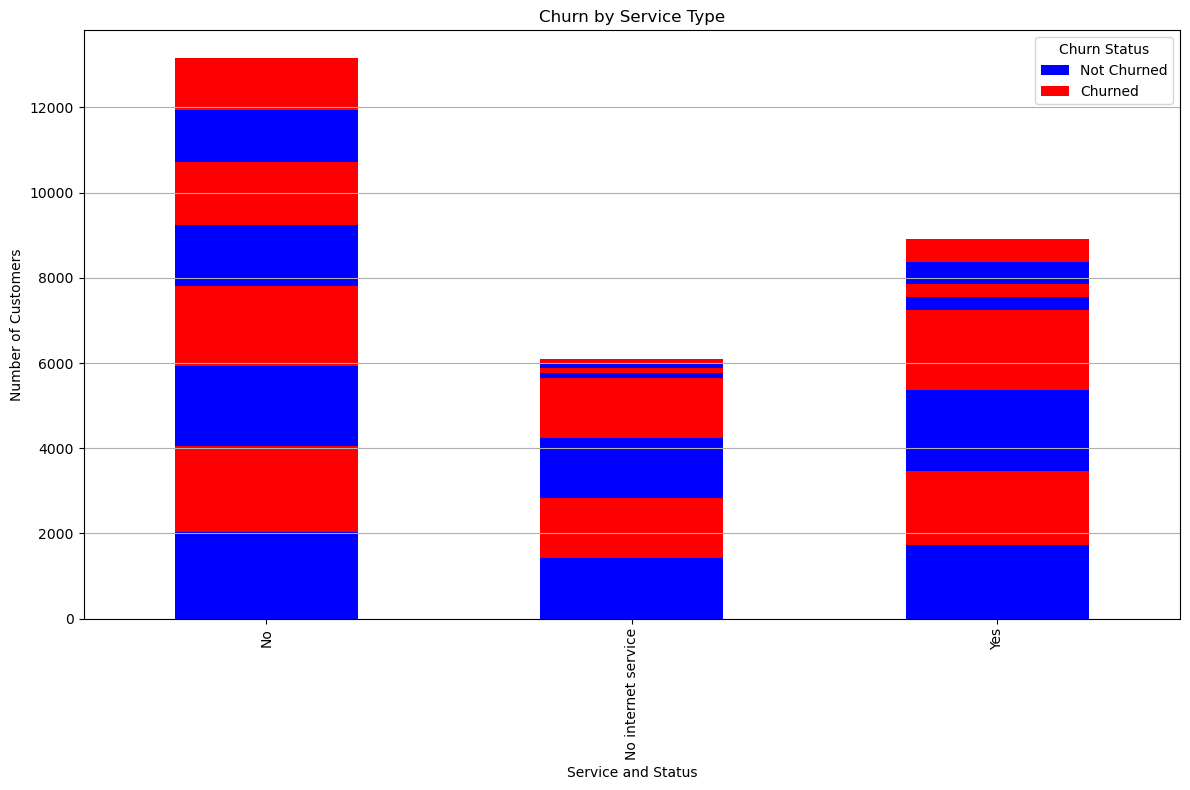

In [856]:
# Function to get churn counts for a given service
def get_churn_counts(service):
    return df.groupby([service, 'Churn Value']).size().unstack(fill_value=0)

# Get churn counts for each service
tech_support_counts = get_churn_counts('Tech Support')
online_security_counts = get_churn_counts('Online Security')
online_backup_counts = get_churn_counts('Online Backup')
device_protection_counts = get_churn_counts('Device Protection')

# Combine data into one DataFrame
churn_data = pd.concat([
    tech_support_counts.rename(index=str, columns={0: 'Not Churned', 1: 'Churned'}),
    online_security_counts.rename(index=str, columns={0: 'Not Churned', 1: 'Churned'}),
    online_backup_counts.rename(index=str, columns={0: 'Not Churned', 1: 'Churned'}),
    device_protection_counts.rename(index=str, columns={0: 'Not Churned', 1: 'Churned'})
], keys=['Tech Support', 'Online Security', 'Online Backup', 'Device Protection'])

# Plotting
fig, ax = plt.subplots(figsize=(12, 8))

churn_data.unstack(level=0).plot(kind='bar', stacked=True, color=['blue', 'red'], ax=ax)

plt.title('Churn by Service Type')
plt.xlabel('Service and Status')
plt.ylabel('Number of Customers')
plt.legend(['Not Churned', 'Churned'], title='Churn Status')
plt.grid(axis='y')

plt.tight_layout()
plt.show()

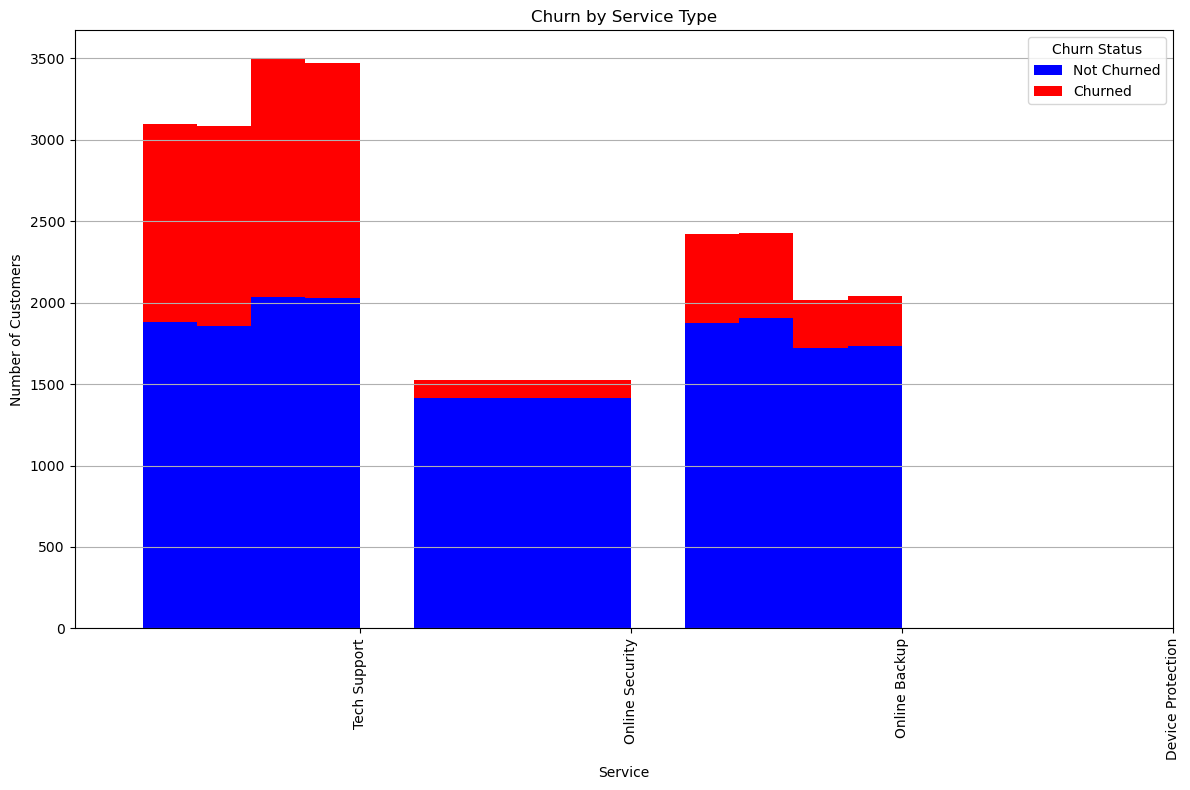

In [860]:
# Function to get churn counts for a given service
def get_churn_counts(service):
    return df.groupby([service, 'Churn Value']).size().unstack(fill_value=0)

# Get churn counts for each service
tech_support_counts = get_churn_counts('Tech Support')
online_security_counts = get_churn_counts('Online Security')
online_backup_counts = get_churn_counts('Online Backup')
device_protection_counts = get_churn_counts('Device Protection')

# Combine data into one DataFrame for easier plotting
services = ['Tech Support', 'Online Security', 'Online Backup', 'Device Protection']
churn_data = pd.concat([get_churn_counts(service) for service in services], keys=services)

# Plotting
fig, ax = plt.subplots(figsize=(12, 8))

bar_width = 0.2
index = range(len(services))

for i, service in enumerate(services):
    churn_data.loc[service].plot(kind='bar', stacked=True, color=['blue', 'red'], ax=ax, width=bar_width, position=i)

# Set up custom x-axis labels and positions
ax.set_xticks([r + bar_width for r in range(len(services))])
ax.set_xticklabels(services)

plt.title('Churn by Service Type')
plt.xlabel('Service')
plt.ylabel('Number of Customers')
plt.legend(['Not Churned', 'Churned'], title='Churn Status')
plt.grid(axis='y')

plt.tight_layout()
plt.show()

In [121]:
X_train_fe = feature_eng(X_train)

In [122]:
lr = LogisticRegression(max_iter=300, random_state=10)

In [123]:
lr.fit(X_train_fe, y_train)

LogisticRegression(max_iter=300, random_state=10)

In [124]:
X_train_fe[['prob_stay', 'prob_churn']] = lr.predict_proba(X_train_fe)

In [95]:
X_train_fe.head(10)

,Gender,Senior Citizen,Partner,Dependents,Tenure Months,Phone Service,Multiple Lines,Online Security,Online Backup,Device Protection,...,IS_Fiber optic,IS_No,Con_One year,Con_Two year,Pay_Credit card (automatic),Pay_Electronic check,Pay_Mailed check,prob_stay,prob_churn,y_pred
2142,0,0,1,0,71,1,1,0,0,1,...,1,0,1,0,1,0,0,0.814387,0.185613,0
1623,1,0,0,0,16,1,0,0,1,1,...,1,0,0,0,1,0,0,0.469827,0.530173,1
6074,1,0,0,0,32,1,1,0,1,1,...,1,0,1,0,1,0,0,0.587713,0.412287,0
1362,1,1,1,0,24,0,0,0,0,1,...,0,0,0,0,1,0,0,0.574058,0.425942,0
6754,1,0,1,1,20,1,0,0,0,0,...,0,1,0,0,0,0,1,0.973452,0.026548,0
1212,1,0,0,0,2,1,1,0,0,0,...,1,0,0,0,0,1,0,0.233862,0.766138,1
2722,1,0,1,0,52,1,0,1,0,1,...,0,0,1,0,0,0,1,0.929582,0.070418,0
4006,1,0,1,0,37,1,0,0,0,0,...,0,1,1,0,0,0,0,0.957290,0.042710,0
6791,1,0,0,0,41,1,1,1,0,1,...,0,0,0,0,0,0,0,0.880530,0.119470,0
5466,0,0,1,1,58,1,0,0,1,0,...,0,0,1,0,1,0,0,0.986746,0.013254,0


In [125]:
X_train_fe['y_pred'] = np.where(X_train_fe['prob_churn']>.5, 1, 0)

In [126]:
print(metrics.confusion_matrix(y_train, X_train_fe['y_pred']))

[[3739  426]
 [ 619  850]]


In [127]:
def get_results(actual, predicted):
    print("The confusion matrix for your predictions is:")
    print(metrics.confusion_matrix(actual, predicted), "\n")
    print(f'The accuracy of your model is: {metrics.accuracy_score(actual, predicted)}')
    print(f'The recall of your model is: {metrics.recall_score(actual, predicted)}')
    print(f'The precision of your model is: {metrics.precision_score(actual, predicted)}')
    print(f'The F1-score of your model is: {metrics.f1_score(actual, predicted)}')

In [128]:
get_results(y_train, X_train_fe['y_pred'])

The confusion matrix for your predictions is:
[[3739  426]
 [ 619  850]] 

The accuracy of your model is: 0.8145189918352858
The recall of your model is: 0.5786249149081008
The precision of your model is: 0.6661442006269592
The F1-score of your model is: 0.6193078324225865


In [129]:
X_test_fe = feature_eng(X_test)

In [130]:
X_test_fe[['prob_stay', 'prob_churn']] = lr.predict_proba(X_test_fe)

In [131]:
X_test_fe['y_pred'] = np.where(X_test_fe['prob_churn']>.5, 1, 0)

In [132]:
get_results(y_test, X_test_fe['y_pred'])

The confusion matrix for your predictions is:
[[896 113]
 [169 231]] 

The accuracy of your model is: 0.7998580553584103
The recall of your model is: 0.5775
The precision of your model is: 0.6715116279069767
The F1-score of your model is: 0.6209677419354839


In [133]:
print(list(zip(X_train_fe.columns, lr.coef_[0])))

[('Gender', 0.0801336364940116), ('Senior Citizen', 0.2925718227009908), ('Partner', 0.07778172954942364), ('Dependents', -1.0641045857206994), ('Tenure Months', -0.07208557458558003), ('Phone Service', -0.6148800522358479), ('Multiple Lines', 0.2345544921410788), ('Online Security', -0.4629035757862017), ('Online Backup', -0.11442313899865074), ('Device Protection', -0.0333713206103921), ('Tech Support', -0.4533874061389644), ('Streaming TV', 0.1254250511974633), ('Streaming Movies', 0.08418737071956245), ('Paperless Billing', 0.5193741892720122), ('Monthly Charges', 0.004820219669800274), ('Total Charges', 0.0004329850006932035), ('IS_DSL', 0.0024327226663622982), ('IS_Fiber optic', 0.29042758676620367), ('IS_No', -0.611263185514758), ('Con_Month-to-month', 0.5020649623366469), ('Con_One year', -0.2669256638948719), ('Con_Two year', -0.5535421745238508), ('Pay_Bank transfer (automatic)', -0.08171587766235824), ('Pay_Credit card (automatic)', -0.22654284254194593), ('Pay_Electronic ch

In [135]:
sorted(list(zip(X_train_fe.columns, lr.coef_[0])), key = lambda x: x[1], reverse = True)

[('Paperless Billing', 0.5193741892720122),
 ('Con_Month-to-month', 0.5020649623366469),
 ('Senior Citizen', 0.2925718227009908),
 ('IS_Fiber optic', 0.29042758676620367),
 ('Pay_Electronic check', 0.24879959515388694),
 ('Multiple Lines', 0.2345544921410788),
 ('Streaming TV', 0.1254250511974633),
 ('Streaming Movies', 0.08418737071956245),
 ('Gender', 0.0801336364940116),
 ('Partner', 0.07778172954942364),
 ('Monthly Charges', 0.004820219669800274),
 ('IS_DSL', 0.0024327226663622982),
 ('Total Charges', 0.0004329850006932035),
 ('Device Protection', -0.0333713206103921),
 ('Tenure Months', -0.07208557458558003),
 ('Pay_Bank transfer (automatic)', -0.08171587766235824),
 ('Online Backup', -0.11442313899865074),
 ('Pay_Credit card (automatic)', -0.22654284254194593),
 ('Pay_Mailed check', -0.25894375103134615),
 ('Con_One year', -0.2669256638948719),
 ('Tech Support', -0.4533874061389644),
 ('Online Security', -0.4629035757862017),
 ('Con_Two year', -0.5535421745238508),
 ('IS_No', -0.

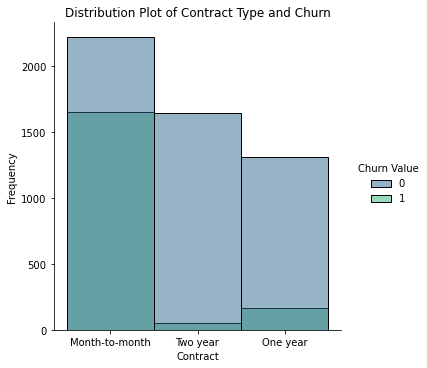

In [138]:
sns.displot(data=df, x='Contract', hue='Churn Value', kind='hist',  palette='viridis', bins=20)
plt.title('Distribution Plot of Contract Type and Churn')
plt.xlabel('Contract')
plt.ylabel('Frequency')
plt.show()

In [136]:
df.head()

,CustomerID,Count,Country,State,City,Zip Code,Lat Long,Latitude,Longitude,Gender,...,Streaming TV,Streaming Movies,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Label,Churn Value,Churn Reason
0,3668-QPYBK,1,United States,California,Los Angeles,90003,"33.964131, -118.272783",33.964131,-118.272783,Male,...,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1,Competitor made better offer
1,9237-HQITU,1,United States,California,Los Angeles,90005,"34.059281, -118.30742",34.059281,-118.307420,Female,...,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1,Moved
2,9305-CDSKC,1,United States,California,Los Angeles,90006,"34.048013, -118.293953",34.048013,-118.293953,Female,...,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes,1,Moved
3,7892-POOKP,1,United States,California,Los Angeles,90010,"34.062125, -118.315709",34.062125,-118.315709,Female,...,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes,1,Moved
4,0280-XJGEX,1,United States,California,Los Angeles,90015,"34.039224, -118.266293",34.039224,-118.266293,Male,...,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.3,Yes,1,Competitor had better devices


## More Feature Engineering

Creating a function with all the feature engineering

In [208]:
def feature_eng(dataframe):
    
    # Make a copy of dataframe
    df = dataframe.copy()
    
    ##### Mapping columns #######
    # list of columns with yes's and no's
    yn_cols = ['Senior Citizen','Partner','Dependents','Phone Service','Multiple Lines','Online Security',
             'Online Backup','Device Protection','Tech Support','Streaming TV','Streaming Movies',
             'Paperless Billing']
    # mapping these columns
    for col in yn_cols:
        df[f'{col}'] = df[f'{col}'].map({'No':0, 'Yes':1, 'No phone service':0, 'No internet service':0, 0:0})
        df[f'{col}'].astype(int)
    # mapping gender column
    df['Gender'] = df['Gender'].map({'Male':0, 'Female': 1})
    
    ###### Drop Columns #########
    df.drop(['CustomerID', 'Count', 'Country', 'State', 'City', 'Zip Code',
            'Lat Long', 'Latitude', 'Longitude', 'Churn Label'], axis = 1, inplace = True)
    
    ###### OHE ###############
    df = pd.get_dummies(data = df, columns = ['Internet Service'], prefix='IS', drop_first=False, dtype = int)
    df = pd.get_dummies(data = df, columns = ['Contract'], prefix='Contract', drop_first=False, dtype = int)
    df = pd.get_dummies(data = df, columns = ['Payment Method'], prefix='PM', drop_first=False, dtype = int)
    
    # Churn Reason has nulls
    df['Churn Reason'] = df['Churn Reason'].fillna(value = 'None')
    df = pd.get_dummies(data = df, columns = ['Churn Reason'], prefix='Reason', drop_first=False, dtype = int)
    
    ##### Target Columns - hidden nulls in diguise #############################
    # Converts the column to float type with the empty string as nulls
    df['Total Charges'] = pd.to_numeric(df['Total Charges'], errors='coerce')

    # Fills nulls with zeros 
    df['Total Charges'] = df['Total Charges'].fillna(value = 0)
    
    return df

In [210]:
df_fe = feature_eng(df)

In [212]:
df_fe.head()

,Gender,Senior Citizen,Partner,Dependents,Tenure Months,Phone Service,Multiple Lines,Online Security,Online Backup,Device Protection,Tech Support,Streaming TV,Streaming Movies,Paperless Billing,Monthly Charges,Total Charges,Churn Value,IS_DSL,IS_Fiber optic,IS_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PM_Bank transfer (automatic),PM_Credit card (automatic),PM_Electronic check,PM_Mailed check,Reason_Attitude of service provider,Reason_Attitude of support person,Reason_Competitor had better devices,Reason_Competitor made better offer,Reason_Competitor offered higher download speeds,Reason_Competitor offered more data,Reason_Deceased,Reason_Don't know,Reason_Extra data charges,Reason_Lack of affordable download/upload speed,Reason_Lack of self-service on Website,Reason_Limited range of services,Reason_Long distance charges,Reason_Moved,Reason_Network reliability,Reason_None,Reason_Poor expertise of online support,Reason_Poor expertise of phone support,Reason_Price too high,Reason_Product dissatisfaction,Reason_Service dissatisfaction
0,0,0,0,0,2,1,0,1,1,0,0,0,0,1,53.85,108.15,1,1,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1,0,0,1,2,1,0,0,0,0,0,0,0,1,70.70,151.65,1,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
2,1,0,0,1,8,1,1,0,0,1,0,1,1,1,99.65,820.50,1,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
3,1,0,1,1,28,1,1,0,0,1,1,1,1,1,104.80,3046.05,1,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4,0,0,0,1,49,1,1,0,1,1,0,1,1,1,103.70,5036.30,1,0,1,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


###### Ignore

In [148]:
# for col in df.columns:
#         col_name = col.replace(' ', '_')
#         df[f'{col_name}'] = df[f'{col}']
#         df.drop(f'{col}')

KeyError: "['CustomerID'] not found in axis"

In [146]:
df.columns

Index(['CustomerID', 'Count', 'Country', 'State', 'City', 'Zip Code',
       'Lat Long', 'Latitude', 'Longitude', 'Gender', 'Senior Citizen',
       'Partner', 'Dependents', 'Tenure Months', 'Phone Service',
       'Multiple Lines', 'Internet Service', 'Online Security',
       'Online Backup', 'Device Protection', 'Tech Support', 'Streaming TV',
       'Streaming Movies', 'Contract', 'Paperless Billing', 'Payment Method',
       'Monthly Charges', 'Total Charges', 'Churn Label', 'Churn Value',
       'Churn Reason', 'Zip_Code', 'Lat_Long', 'Senior_Citizen',
       'Tenure_Months', 'Phone_Service', 'Multiple_Lines', 'Internet_Service',
       'Online_Security', 'Online_Backup', 'Device_Protection', 'Tech_Support',
       'Streaming_TV', 'Streaming_Movies', 'Paperless_Billing',
       'Payment_Method', 'Monthly_Charges', 'Total_Charges', 'Churn_Label',
       'Churn_Value', 'Churn_Reason'],
      dtype='object')

## Train Test Split

In [156]:
df_fe.columns

Index(['Gender', 'Senior Citizen', 'Partner', 'Dependents', 'Tenure Months',
       'Phone Service', 'Multiple Lines', 'Online Security', 'Online Backup',
       'Device Protection', 'Tech Support', 'Streaming TV', 'Streaming Movies',
       'Paperless Billing', 'Monthly Charges', 'Total Charges', 'Churn Value',
       'IS_DSL', 'IS_Fiber optic', 'IS_No', 'Contract_Month-to-month',
       'Contract_One year', 'Contract_Two year',
       'PM_Bank transfer (automatic)', 'PM_Credit card (automatic)',
       'PM_Electronic check', 'PM_Mailed check',
       'CR_Attitude of service provider', 'CR_Attitude of support person',
       'CR_Competitor had better devices', 'CR_Competitor made better offer',
       'CR_Competitor offered higher download speeds',
       'CR_Competitor offered more data', 'CR_Deceased', 'CR_Don't know',
       'CR_Extra data charges', 'CR_Lack of affordable download/upload speed',
       'CR_Lack of self-service on Website', 'CR_Limited range of services',
       'CR

In [172]:
feature_cols = ['Gender', 'Senior Citizen', 'Partner', 'Dependents', 'Tenure Months',
       'Phone Service', 'Multiple Lines', 'Online Security', 'Online Backup',
       'Device Protection', 'Tech Support', 'Streaming TV', 'Streaming Movies',
       'Paperless Billing', 'Monthly Charges', 'Total Charges', 
       'IS_DSL', 'IS_Fiber optic', 'IS_No', 'Contract_Month-to-month',
       'Contract_One year', 'Contract_Two year',
       'PM_Bank transfer (automatic)', 'PM_Credit card (automatic)',
       'PM_Electronic check', 'PM_Mailed check',
       'CR_Attitude of service provider', 'CR_Attitude of support person',
       'CR_Competitor had better devices', 'CR_Competitor made better offer',
       'CR_Competitor offered higher download speeds',
       'CR_Competitor offered more data', 'CR_Deceased', 'CR_Don\'t know',
       'CR_Extra data charges', 'CR_Lack of affordable download/upload speed',
       'CR_Lack of self-service on Website', 'CR_Limited range of services',
       'CR_Long distance charges', 'CR_Moved', 'CR_Network reliability',
       'CR_None', 'CR_Poor expertise of online support',
       'CR_Poor expertise of phone support', 'CR_Price too high',
       'CR_Product dissatisfaction', 'CR_Service dissatisfaction']


In [174]:
X = df_fe[feature_cols]
y = df_fe['Churn Value']

In [176]:
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size = 0.2, 
                                                    random_state = 42)

## Modelling

**Random Forest!!!**

##### Base Model- No hyper parameters, no cv

In [186]:
# The Model
rf = RandomForestClassifier()

# Fit it!
rf.fit(X_train, y_train)

RandomForestClassifier()

In [190]:
print(f'The training accuracy is :{rf.score(X_train, y_train)}')
print(f'The testing accuracy is :{rf.score(X_test, y_test)}')

The training accuracy is :1.0
The testing accuracy is :1.0


##### Now Play Around with stuff

In [200]:
## Check respective cross validation scores if overfitting need to tune as shown below


rf_score = cross_val_score(rf, X_train, y_train, cv=5)
rf_score ##?????


array([1., 1., 1., 1., 1.])

In [ ]:
rf(criterion = 'entropy',
   max_depth=3,
                            n_estimators=50)

In [198]:
python -version

NameError: name 'python' is not defined

In [215]:
lst = [(10,-5), (6,20), ('a', -10)]

In [217]:
sorted(lst, key = lambda x: abs(x[1]), reverse = True)

[(6, 20), ('a', -10), (10, -5)]

## Logistic Regression Modelling

In [577]:
## Import Logistic Regression from sklearn
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, precision_score, recall_score, auc,roc_curve
from sklearn.preprocessing import MinMaxScaler, LabelEncoder, StandardScaler

In [752]:
# Read in data
df = pd.read_csv('Swan_Project_Data.csv')

In [754]:
df.head()

,CustomerID,Count,Country,State,City,Zip Code,Lat Long,Latitude,Longitude,Gender,Senior Citizen,Partner,Dependents,Tenure Months,Phone Service,Multiple Lines,Internet Service,Online Security,Online Backup,Device Protection,Tech Support,Streaming TV,Streaming Movies,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Label,Churn Value,Churn Reason
0,3668-QPYBK,1,United States,California,Los Angeles,90003,"33.964131, -118.272783",33.964131,-118.272783,Male,No,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1,Competitor made better offer
1,9237-HQITU,1,United States,California,Los Angeles,90005,"34.059281, -118.30742",34.059281,-118.307420,Female,No,No,Yes,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1,Moved
2,9305-CDSKC,1,United States,California,Los Angeles,90006,"34.048013, -118.293953",34.048013,-118.293953,Female,No,No,Yes,8,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes,1,Moved
3,7892-POOKP,1,United States,California,Los Angeles,90010,"34.062125, -118.315709",34.062125,-118.315709,Female,No,Yes,Yes,28,Yes,Yes,Fiber optic,No,No,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes,1,Moved
4,0280-XJGEX,1,United States,California,Los Angeles,90015,"34.039224, -118.266293",34.039224,-118.266293,Male,No,No,Yes,49,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.3,Yes,1,Competitor had better devices


###### Fe Function

In [757]:
def feature_eng(dataframe):
    
    # Make a copy of dataframe
    df = dataframe.copy()
    
    ##### Mapping columns #######
    # list of columns with yes's and no's
    yn_cols = ['Senior Citizen','Partner','Dependents','Phone Service','Multiple Lines','Online Security',
             'Online Backup','Device Protection','Tech Support','Streaming TV','Streaming Movies',
             'Paperless Billing']
    # mapping these columns
    for col in yn_cols:
        df[f'{col}'] = df[f'{col}'].map({'No':0, 'Yes':1, 'No phone service':0, 'No internet service':0, 0:0})
        df[f'{col}'].astype(int)
    # mapping gender column
    df['Gender'] = df['Gender'].map({'Male':0, 'Female': 1})
    
    ###### Drop Columns #########
    df.drop(['CustomerID', 'Count', 'Country', 'State', 'City', 'Zip Code',
            'Lat Long', 'Latitude', 'Longitude', 'Churn Label', 'Churn Reason'], axis = 1, inplace = True)
    
    ###### OHE ###############
    df = pd.get_dummies(data = df, columns = ['Internet Service'], prefix='IS', drop_first=False, dtype = int)
    df = pd.get_dummies(data = df, columns = ['Contract'], prefix='Con', drop_first=False, dtype = int)
    df = pd.get_dummies(data = df, columns = ['Payment Method'], prefix='Pay', drop_first=False, dtype = int)
    
    # Churn Reason has nulls
#     df['Churn Reason'] = df['Churn Reason'].fillna(value = 'None')
#   df = pd.get_dummies(data = df, columns = ['Churn Reason'], prefix='Reason', drop_first=True, dtype = int)

    
    ##### Target Columns - hidden nulls in diguise 
    df['Total Charges'] = pd.to_numeric(df['Total Charges'], errors='coerce')

    # Fills nulls with zeros 
    df['Total Charges'] = df['Total Charges'].fillna(value = 0)
    
    return df

### 

In [760]:
#### Train Test Split

In [762]:
df_x = df.drop('Churn Value', axis = 1)
X_train, X_test, y_train, y_test = train_test_split(df_x, 
                                                    df['Churn Value'], 
                                                    test_size = 0.2, 
                                                    random_state = 42)

In [764]:
X_train_fe = feature_eng(X_train)
X_test_fe = feature_eng(X_test)

In [766]:
X_train_fe.head()

,Gender,Senior Citizen,Partner,Dependents,Tenure Months,Phone Service,Multiple Lines,Online Security,Online Backup,Device Protection,Tech Support,Streaming TV,Streaming Movies,Paperless Billing,Monthly Charges,Total Charges,IS_DSL,IS_Fiber optic,IS_No,Con_Month-to-month,Con_One year,Con_Two year,Pay_Bank transfer (automatic),Pay_Credit card (automatic),Pay_Electronic check,Pay_Mailed check
2142,0,0,1,0,71,1,1,0,0,1,0,1,1,1,98.65,6962.85,0,1,0,0,1,0,0,1,0,0
1623,1,0,0,0,16,1,0,0,1,1,0,0,1,1,93.20,1573.70,0,1,0,1,0,0,0,1,0,0
6074,1,0,0,0,32,1,1,0,1,1,0,1,1,1,104.05,3416.85,0,1,0,0,1,0,0,1,0,0
1362,1,1,1,0,24,0,0,0,0,1,0,0,1,1,40.65,933.30,1,0,0,1,0,0,0,1,0,0
6754,1,0,1,1,20,1,0,0,0,0,0,0,0,0,20.05,406.05,0,0,1,1,0,0,0,0,0,1


In [768]:
# # Encode categorical variables
# le = LabelEncoder()
# for col in X_train_fe.select_dtypes(include=['object']).columns:
#     X_train_fe[col] = le.fit_transform(X_train_fe[col])
#     X_test_fe[col] = le.transform(X_test_fe[col])

    
# Differnt Scalers
scaler = MinMaxScaler()
#scaler = StandardScaler()

# Scale the features
X_train_fes = scaler.fit_transform(X_train_fe)  # Fit on train data and transform it
X_test_fes = scaler.transform(X_test_fe)   
   

In [770]:
# Modelling and Fitting
lr = LogisticRegression(max_iter=300, random_state=10)
lr.fit(X_train_fes, y_train)

LogisticRegression(max_iter=300, random_state=10)

In [772]:
#X_train_fe.head()

In [774]:
y_pred = lr.predict(X_test_fes)

print('Accuracy of logistic regression classifier on train set: {:.2f}'.format(lr.score(X_train_fes, y_train)))
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(lr.score(X_test_fes, y_test)))
print('Precision of logistic regression classifier on test set: {:.2f}'.format(precision_score(y_test, y_pred)))

Accuracy of logistic regression classifier on train set: 0.82
Accuracy of logistic regression classifier on test set: 0.80
Precision of logistic regression classifier on test set: 0.68


In [776]:
#X_train_fe[['prob_stay', 'prob_churn']] = lr.predict_proba(X_train_fe)

In [778]:
#X_train_fe.head(10)

In [780]:
#X_train_fe['y_pred'] = np.where(X_train_fe['prob_churn']>.5, 1, 0)

In [782]:
#print(metrics.confusion_matrix(y_train, X_train_fe['y_pred']))

In [784]:
# def get_results(actual, predicted):
#     print("The confusion matrix for your predictions is:")
#     print(metrics.confusion_matrix(actual, predicted), "\n")
#     print(f'The accuracy of your model is: {metrics.accuracy_score(actual, predicted)}')
#     print(f'The recall of your model is: {metrics.recall_score(actual, predicted)}')
#     print(f'The precision of your model is: {metrics.precision_score(actual, predicted)}')
#     print(f'The F1-score of your model is: {metrics.f1_score(actual, predicted)}')

In [786]:
#get_results(y_train, X_train_fe['y_pred'])

In [789]:
# clf = [
#     LogisticRegression(solver='newton-cg',penalty='none',max_iter=1000),
#     LogisticRegression(solver='lbfgs',penalty='none',max_iter=1000),
#     LogisticRegression(solver='sag',penalty='none',max_iter=1000),
#     LogisticRegression(solver='saga',penalty='none',max_iter=1000)
#     ]
# clf_columns = []
# clf_compare = pd.DataFrame(columns = clf_columns)

# row_index = 0
# for alg in clf:
        
#     predicted = alg.fit(X_train_fe, y_train).predict(X_test_fe)
#     fp, tp, th = roc_curve(y_test, predicted)
#     clf_name = alg.__class__.__name__
#     clf_compare.loc[row_index, 'Train Accuracy'] = round(alg.score(X_train_fe, y_train), 5)
#     clf_compare.loc[row_index, 'Test Accuracy'] = round(alg.score(X_test_fe, y_test), 5)
#     clf_compare.loc[row_index, 'Precission'] = round(precision_score(y_test, predicted),5)
#     clf_compare.loc[row_index, 'Recall'] = round(recall_score(y_test, predicted),5)
#     clf_compare.loc[row_index, 'AUC'] = round(auc(fp, tp),5)

#     row_index+=1
    
# clf_compare.sort_values(by = ['Test Accuracy'], ascending = False, inplace = True)    
# clf_compare


In [791]:
# code from: https://medium.com/codex/do-i-need-to-tune-logistic-regression-hyperparameters-1cb2b81fca69
clf = [LogisticRegression(solver='lbfgs',penalty='l2', max_iter=1000)]
    
clf_columns = []
clf_compare = pd.DataFrame(columns = clf_columns)

row_index = 0
for alg in clf:
        
    predicted = alg.fit(X_train_fes, y_train).predict(X_test_fes)
    fp, tp, th = roc_curve(y_test, predicted)
    clf_name = alg.__class__.__name__
    clf_compare.loc[row_index, 'Train Accuracy'] = alg.score(X_train_fes, y_train)
    clf_compare.loc[row_index, 'Test Accuracy'] = alg.score(X_test_fes, y_test)
    clf_compare.loc[row_index, 'Precission'] = precision_score(y_test, predicted)
    clf_compare.loc[row_index, 'Recall'] = recall_score(y_test, predicted)
    clf_compare.loc[row_index, 'AUC'] = auc(fp, tp)

    row_index+=1
    
clf_compare.sort_values(by = ['Test Accuracy'], ascending = False, inplace = True)    
clf_compare

,Train Accuracy,Test Accuracy,Precission,Recall,AUC
0,0.815406,0.804116,0.683432,0.5775,0.735727


In [728]:
X_train_fes = pd.DataFrame(X_train_fes, columns=X_train_fe.columns)
X_test_fes = pd.DataFrame(X_test_fes, columns=X_test_fe.columns)

In [730]:
X_train_fes.head()

,Gender,Senior Citizen,Partner,Dependents,Tenure Months,Phone Service,Multiple Lines,Online Security,Online Backup,Device Protection,Tech Support,Streaming TV,Streaming Movies,Paperless Billing,Monthly Charges,Total Charges,IS_DSL,IS_Fiber optic,IS_No,Con_Month-to-month,Con_One year,Con_Two year,Pay_Bank transfer (automatic),Pay_Credit card (automatic),Pay_Electronic check,Pay_Mailed check
0,0.0,0.0,1.0,0.0,0.986111,1.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,0.801196,0.801728,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
1,1.0,0.0,0.0,0.0,0.222222,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.746886,0.181202,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
2,1.0,0.0,0.0,0.0,0.444444,1.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,0.855007,0.393429,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
3,1.0,1.0,1.0,0.0,0.333333,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.223219,0.107464,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
4,1.0,0.0,1.0,1.0,0.277778,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.017937,0.046754,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0


##### Testing - Ignore for now

In [733]:
X_test_fes[['prob_stay', 'prob_churn']] = lr.predict_proba(X_test_fes)

C:\Users\lenovo\anaconda3\Lib\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


In [735]:
X_test_fes['y_pred'] = np.where(X_test_fes['prob_churn']>.5, 1, 0)

In [737]:
get_results(y_test, X_test_fes['y_pred'])

The confusion matrix for your predictions is:
[[902 107]
 [169 231]] 

The accuracy of your model is: 0.8041163946061036
The recall of your model is: 0.5775
The precision of your model is: 0.6834319526627219
The F1-score of your model is: 0.6260162601626017


In [739]:
print(list(zip(X_train_fes.columns, lr.coef_[0])))

[('Gender', 0.03523980746695323), ('Senior Citizen', 0.09705368174871054), ('Partner', 0.2454480789178573), ('Dependents', -1.4241897970414334), ('Tenure Months', -3.4355511760268587), ('Phone Service', -0.5089497211824122), ('Multiple Lines', 0.29382082612569443), ('Online Security', -0.4056134054134513), ('Online Backup', -0.10289984963731999), ('Device Protection', 0.016183791297012435), ('Tech Support', -0.35249954347576895), ('Streaming TV', 0.19879531764947383), ('Streaming Movies', 0.1377263241980646), ('Paperless Billing', 0.3808174843031805), ('Monthly Charges', 0.2896721797522813), ('Total Charges', 1.3320274668893373), ('IS_DSL', 0.027549815304467606), ('IS_Fiber optic', 0.6636009865950931), ('IS_No', -0.6952559752657971), ('Con_Month-to-month', 0.6726836807482429), ('Con_One year', 0.03759897304292541), ('Con_Two year', -0.7143878271573791), ('Pay_Bank transfer (automatic)', -0.039245806020731154), ('Pay_Credit card (automatic)', -0.17981108183900818), ('Pay_Electronic chec

In [741]:
sorted(list(zip(X_train_fes.columns, lr.coef_[0])), key = lambda x: x[1], reverse = True)

[('Total Charges', 1.3320274668893373),
 ('Con_Month-to-month', 0.6726836807482429),
 ('IS_Fiber optic', 0.6636009865950931),
 ('Paperless Billing', 0.3808174843031805),
 ('Multiple Lines', 0.29382082612569443),
 ('Monthly Charges', 0.2896721797522813),
 ('Pay_Electronic check', 0.26364530052597396),
 ('Partner', 0.2454480789178573),
 ('Streaming TV', 0.19879531764947383),
 ('Streaming Movies', 0.1377263241980646),
 ('Senior Citizen', 0.09705368174871054),
 ('Con_One year', 0.03759897304292541),
 ('Gender', 0.03523980746695323),
 ('IS_DSL', 0.027549815304467606),
 ('Device Protection', 0.016183791297012435),
 ('Pay_Bank transfer (automatic)', -0.039245806020731154),
 ('Pay_Mailed check', -0.04869358603243237),
 ('Online Backup', -0.10289984963731999),
 ('Pay_Credit card (automatic)', -0.17981108183900818),
 ('Tech Support', -0.35249954347576895),
 ('Online Security', -0.4056134054134513),
 ('Phone Service', -0.5089497211824122),
 ('IS_No', -0.6952559752657971),
 ('Con_Two year', -0.714

In [ ]:
## saw a change here from what egle had

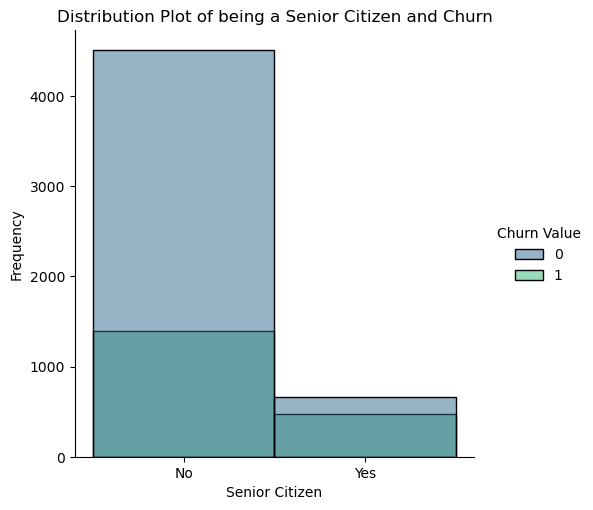

In [895]:
 sns.displot(data=df, x='Senior Citizen', kind='hist', hue = 'Churn Value',palette='viridis', bins=2)
plt.title('Distribution Plot of being a Senior Citizen and Churn')
plt.xlabel('Senior Citizen')
plt.ylabel('Frequency')
plt.show()